In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML

In [3]:
import visualize
import world_generator
import evaluation
import projections

In [4]:
# enable animations to render inline.
# requires ffmpeg to be installed (`sudo apt install ffmpeg`)
rc('animation', html='html5')

In [5]:
N_a, M_a, g_bas = world_generator.generate_world(num_regions=256, spread_rate=0.2, self_spread_rate=2.0)
# N_a, M_a, g_ba

In [6]:
N_a.shape, M_a.shape, [g_ba.shape for g_ba in g_bas]

((256,), (256, 256), [(64, 256), (16, 64), (4, 16), (1, 4)])

# Close: 10 cases; Re-open: 0.1 cases

In [7]:
results = evaluation.evaluate(
    M_a,
    projection_method=projections.Projections().sub_matrix_eigenvector,
    g_bas=g_bas,
    N_a_0=N_a,
    num_steps=100,
    lock_down_threshold=10,
    re_open_threshold=0.1,
    intervention_strategy=True)

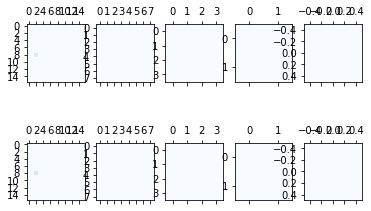

In [8]:
anim = visualize.animate_results(results)

## N_a vs. N_b across scales

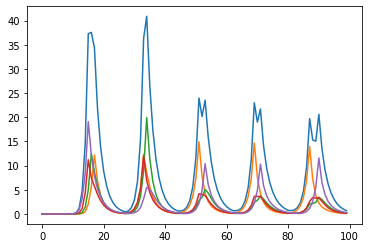

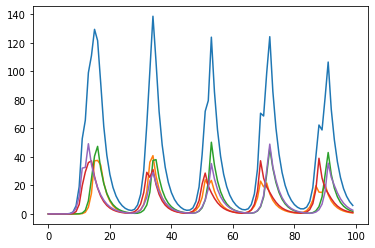

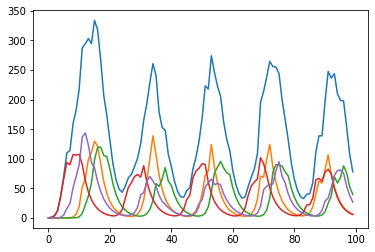

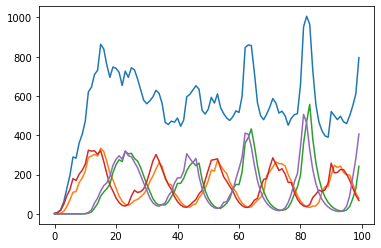

In [9]:
for i in range(len(g_bas)):
    visualize.plot_case_counts_two_scales(results['N_bs'][i], results['N_bs'][i+1], 0, g_bas[i])

## N_b vs. N_b_hat across scales (evolution at 1st level of coarse-graining)

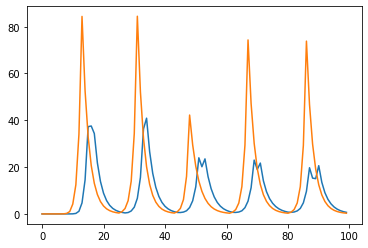

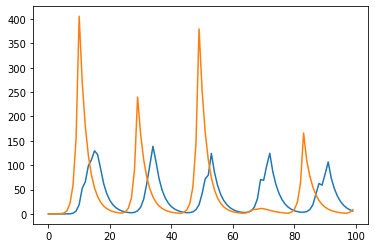

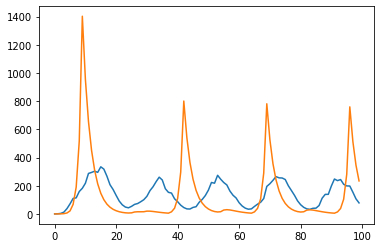

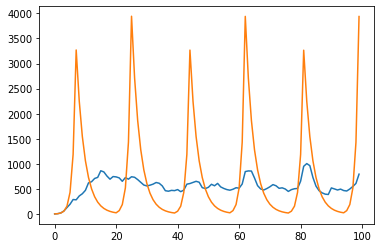

In [10]:
for i in range(len(g_bas)):
    visualize.plot_case_counts_one_scale(results['N_bs'][i+1], results['N_b_hats'][i+1], 0)

In [11]:
len(results['N_bs']), len(results['N_b_hats'])

(5, 5)

In [12]:
anim